# Bobcat Population Analysis

In [54]:
# Imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy.linalg as linalg

# Base variables and functions
identity_matrix = np.identity(16)
default_t0_population = np.array([100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100])
default_number_of_years = 10

## Base Model

    Year    Population
0      0   1600.000000
1      1   2714.000000
2      2   3328.480000
3      3   3796.875200
4      4   4419.046720
5      5   5202.774149
6      6   6137.800338
7      7   7246.737105
8      8   8562.717287
9      9  10122.748504
10    10  11970.232327


<AxesSubplot:xlabel='Population', ylabel='Year'>

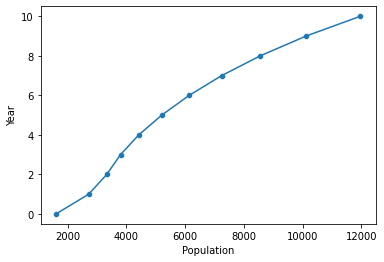

In [55]:
default_leslie_matrix = np.array([[0.6, 0.6, 1.15, 1.15, 1.15, 1.15, 1.15, 1.15, 1.15, 1.15, 1.15, 1.15, 1.15, 1.15, 1.15, 1.15],
                         [0.32, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                         [0, 0.68, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                         [0, 0, 0.68, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                         [0, 0, 0, 0.68, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                         [0, 0, 0, 0, 0.68, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                         [0, 0, 0, 0, 0, 0.68, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                         [0, 0, 0, 0, 0, 0, 0.68, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                         [0, 0, 0, 0, 0, 0, 0, 0.68, 0, 0, 0, 0, 0, 0, 0, 0],
                         [0, 0, 0, 0, 0, 0, 0, 0, 0.68, 0, 0, 0, 0, 0, 0, 0],
                         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.68, 0, 0, 0, 0, 0, 0],
                         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.68, 0, 0, 0, 0, 0],
                         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.68, 0, 0, 0, 0],
                         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.68, 0, 0, 0],
                         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.68, 0, 0],
                         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.68, 0]])

def growth(t0_population = default_t0_population, leslie_matrix = default_leslie_matrix, number_of_years = default_number_of_years):
    nth_population = np.zeros(number_of_years+1)
    nth_population[0] = np.sum(t0_population)
    nth_year = np.arange(number_of_years+1)
    for i in nth_year[1:number_of_years+1]:
        nth_population[i] =  np.sum(linalg.matrix_power(leslie_matrix, i).dot(t0_population))

    df = pd.DataFrame({
        'Year' : nth_year,
        'Population' : nth_population
        })

    print(df)

    return df

data_nth_population = growth()

sns.scatterplot(data = data_nth_population, x = "Population", y = "Year")
sns.lineplot(data = data_nth_population, x = "Population", y = "Year")

## Extended Model

    Year    Population
0      0   1600.000000
1      1   2834.000000
2      2   3645.510000
3      3   4366.250200
4      4   5335.377553
5      5   6593.784618
6      6   8164.763255
7      7  10118.015416
8      8  12548.101581
9      9  15569.373540
10    10  19323.096671


<AxesSubplot:xlabel='Population', ylabel='Year'>

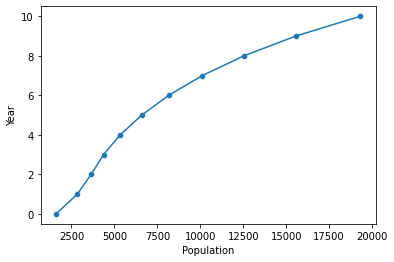

In [56]:
leslie_matrix_extended = np.array([[0.63, 0.63, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2],
                         [0.34, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                         [0, 0.71, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                         [0, 0, 0.71, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                         [0, 0, 0, 0.71, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                         [0, 0, 0, 0, 0.71, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                         [0, 0, 0, 0, 0, 0.71, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                         [0, 0, 0, 0, 0, 0, 0.71, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                         [0, 0, 0, 0, 0, 0, 0, 0.71, 0, 0, 0, 0, 0, 0, 0, 0],
                         [0, 0, 0, 0, 0, 0, 0, 0, 0.71, 0, 0, 0, 0, 0, 0, 0],
                         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.71, 0, 0, 0, 0, 0, 0],
                         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.71, 0, 0, 0, 0, 0],
                         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.71, 0, 0, 0, 0],
                         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.71, 0, 0, 0],
                         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.71, 0, 0],
                         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.71, 0]])

data_nth_population_extended = growth(leslie_matrix = leslie_matrix_extended)

sns.scatterplot(data = data_nth_population_extended, x = "Population", y = "Year")
sns.lineplot(data = data_nth_population_extended, x = "Population", y = "Year")